<a href="https://colab.research.google.com/github/arsharmavlocity/ML/blob/main/MyTelcoProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
from re import X
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Import necessary libraries
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
Image("/content/sample_data/Telco/boxplot.png")
import plotly.express as px


%matplotlib inline


# Custom parser function
def CustomParser(data):
    if pd.isna(data):  # Check if the data is NaN
        return {}  # Return an empty dictionary for NaN values
    return json.loads(data)  # Parse JSON string

# Read the CSV file
#QuoteLine_Array = pd.read_csv('/content/drive/sample_data/Telco/quote_export.csv')
QuoteLine_Array = pd.read_csv('/content/sample_data/QuoteLines.csv - Sheet1 - QuoteLines.csv - Sheet1.csv')

#QuoteLine_Array1 = pd.read_excel("/content/sample_data/Telco/quote_export.csv")

QuoteLine_Array.describe()
QuoteLine_Array.head()



Mounted at /content/drive


,_,Id,IsDeleted,LineNumber,CreatedDate,CreatedById,LastModifiedDate,LastModifiedById,SystemModstamp,LastViewedDate,...,ATT_EffectiveRecurringTotal__c,ATT_Default_Validation_Error__c,OFF_DD_AVSQ__c,Quote_Pricing_Type__c,DD_Availability__c,Quote_Line_EMR__c,QLI_EMR__c,Related_Product__c,ATT_Line_Item_Sequence__c,ATT_Igloo_Rate_Zone__c
0,[QuoteLineItem],0QLDg000000TPEvOAO,False,331119,2024-06-26T14:14:50.000+0000,00523000005IDvvAAG,2024-07-01T08:17:20.000+0000,00523000005IDvvAAG,2024-07-01T08:17:20.000+0000,2024-07-01T08:17:20.000+0000,...,NaN,NaN,NaN,Integrated Port and Router,NaN,1.54,0.0,NaN,30.0,NaN
1,[QuoteLineItem],0QLDg000000TPExOAO,False,331121,2024-06-26T14:14:50.000+0000,00523000005IDvvAAG,2024-07-01T08:17:20.000+0000,00523000005IDvvAAG,2024-07-01T08:17:20.000+0000,2024-07-01T08:17:20.000+0000,...,NaN,NaN,NaN,Integrated Port and Router,NaN,1.54,0.0,NaN,32.0,NaN
2,[QuoteLineItem],0QLDg000000TPEyOAO,False,331122,2024-06-26T14:14:50.000+0000,00523000005IDvvAAG,2024-07-01T08:17:20.000+0000,00523000005IDvvAAG,2024-07-01T08:17:20.000+0000,2024-07-01T08:17:20.000+0000,...,NaN,NaN,NaN,Integrated Port and Router,NaN,1.54,0.0,NaN,33.0,NaN
3,[QuoteLineItem],0QLDg000000TPF0OAO,False,331124,2024-06-26T14:14:50.000+0000,00523000005IDvvAAG,2024-07-01T08:17:20.000+0000,00523000005IDvvAAG,2024-07-01T08:17:20.000+0000,2024-07-01T08:17:20.000+0000,...,NaN,NaN,NaN,Integrated Port and Router,NaN,1.54,0.0,NaN,35.0,NaN
4,[QuoteLineItem],0QLDg000000TPF1OAO,False,331125,2024-06-26T14:14:50.000+0000,00523000005IDvvAAG,2024-07-01T08:17:20.000+0000,00523000005IDvvAAG,2024-07-01T08:17:20.000+0000,2024-07-01T08:17:20.000+0000,...,NaN,NaN,NaN,Integrated Port and Router,NaN,1.54,0.0,NaN,36.0,NaN


# New Section

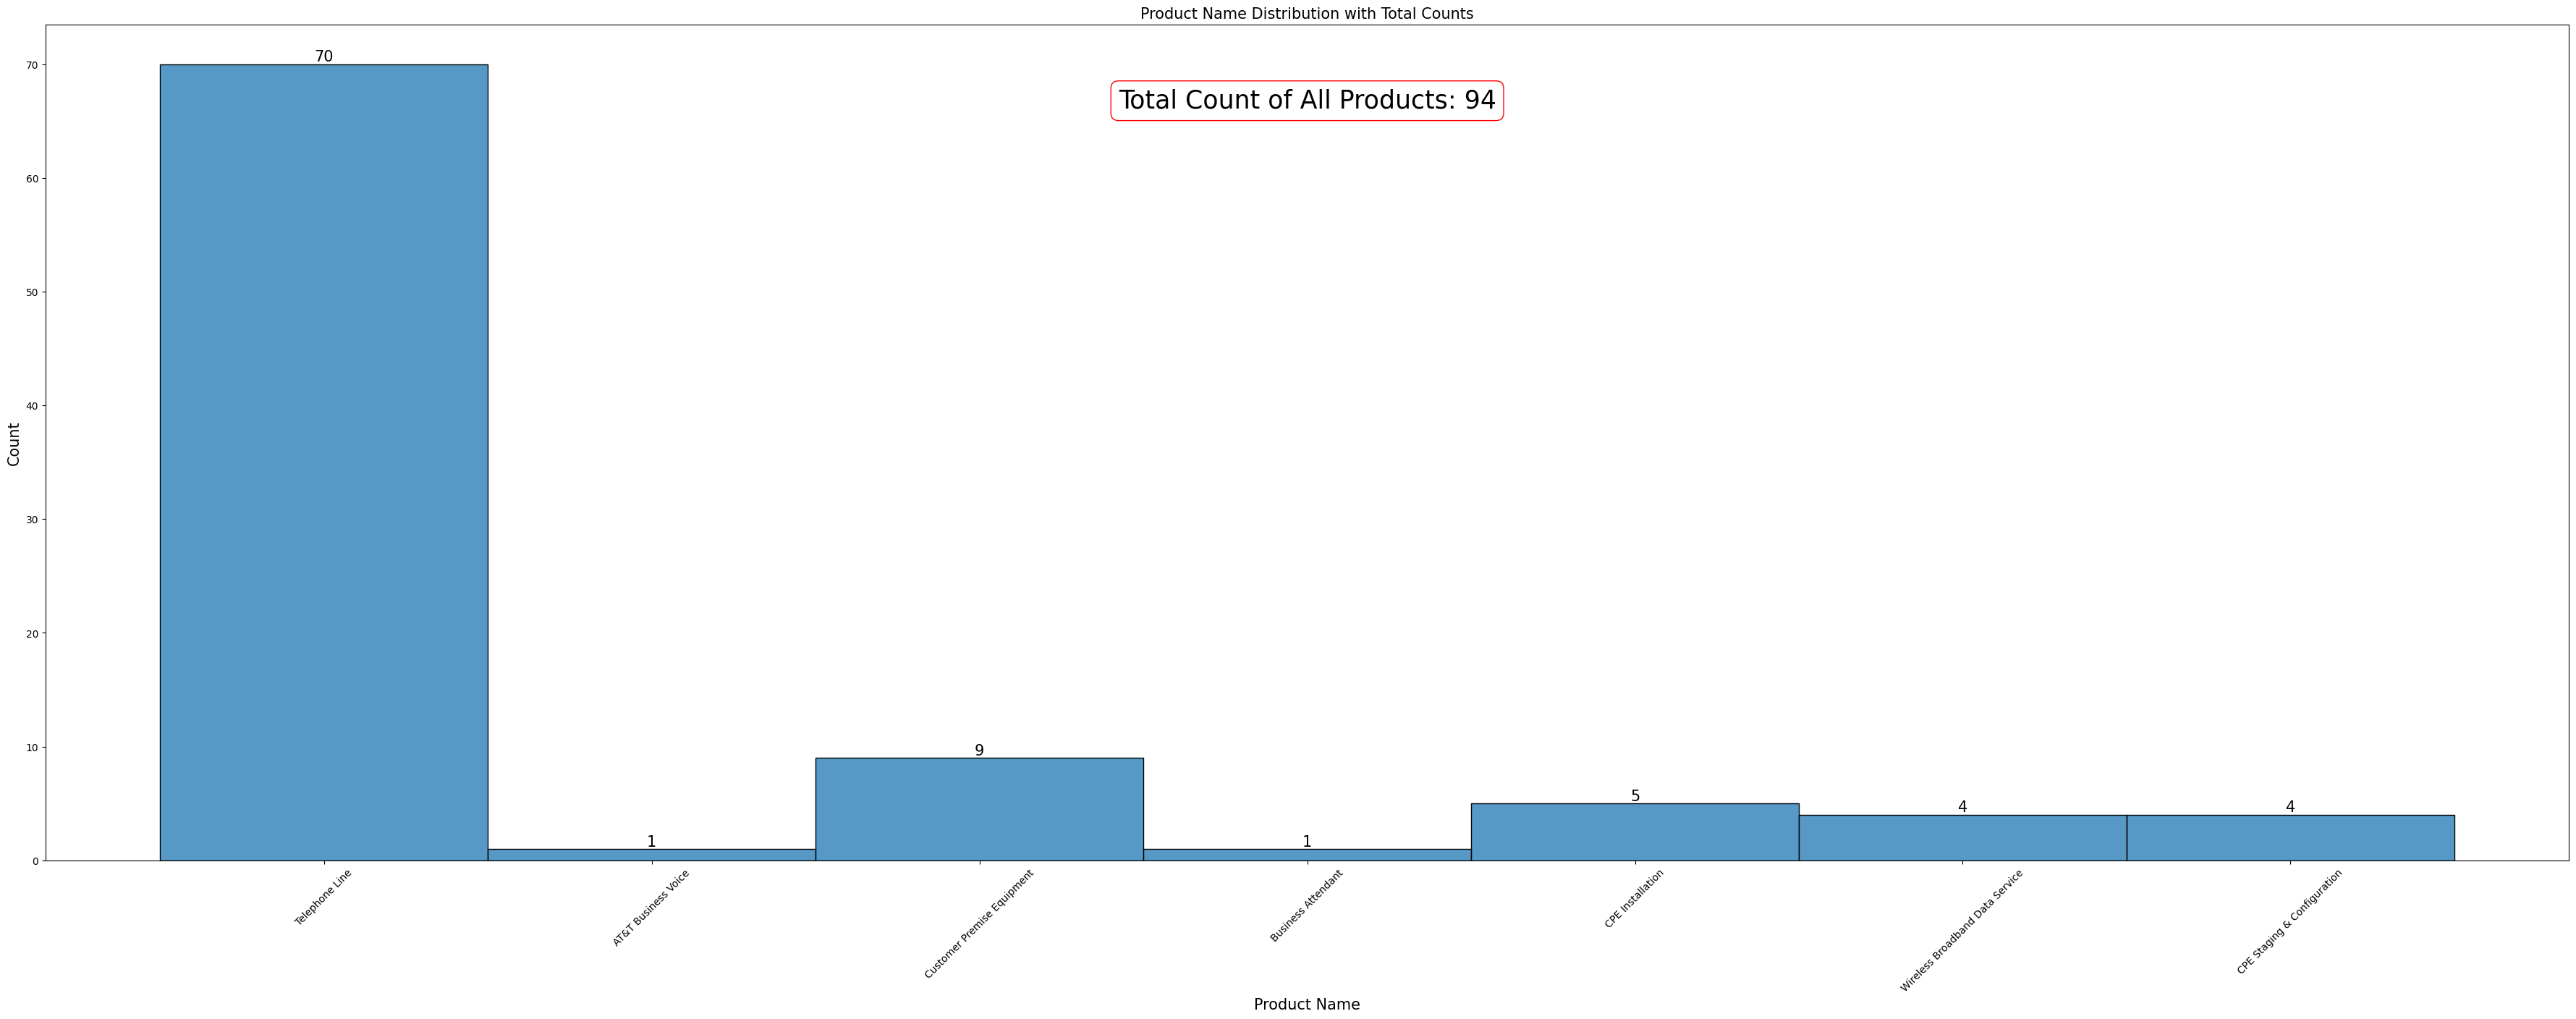

In [ ]:
# Copy the JSON column to a new variable
Attr_Sel_Value_Array = QuoteLine_Array['vlocity_cmt__AttributeSelectedValues__c'].copy()

# Convert the JSON strings in the column to dictionaries
parsed_json = Attr_Sel_Value_Array.apply(CustomParser)
type(parsed_json)
# Normalize the JSON data into a flat table
normalized_data = pd.json_normalize(parsed_json)
#print(type(normalized_data))
# Concatenate the normalized data with the original DataFrame

#result_df['Product_Name__c'].sort_values()
result_df = pd.concat([QuoteLine_Array, normalized_data], axis=1)

result_df1 = pd.concat([Attr_Sel_Value_Array, normalized_data], axis=1)
# Drop the original JSON column if not needed
result_df1.drop(columns=['vlocity_cmt__AttributeSelectedValues__c'], inplace=True)

#result_df.info()

#result_df1.drop(columns=['vlocity_cmt__AttributeSelectedValues__c'], inplace=True,axis

# Display the resulting DataFrame
#print(result_df.head())
result_df.to_csv("/content/sample_data/quote_export_result.csv",index=False)

#print(result_df.head())
#print(result_df.tail)
#result_df['ATT_Directory Listing Options'].unique()
result_df['vlocity_cmt__AttributeSelectedValues__c'].value_counts()

#result_df['vlocity_cmt__AttributeSelectedValues__c'].sort_values()
#result_df.dtypes
#result_df.describe()


#plt.title("ATT Quote")
plt.figure(figsize=(45,15))
plt.xticks(rotation=45)
#plt.annotate()



#data = {'A': [1, 2, 3, 4, 5], 'B': [6, 7, 8, 9, 10]}
#df = pd.DataFrame(data)
#df['A'].median()


result_df12= result_df.groupby(['Product_Name__c'])['vlocity_cmt__AttributeSelectedValues__c'].head().sort_values(ascending=False)

ax = sns.histplot(result_df, x="Product_Name__c", bins=10, discrete=True)

#sns.histplot(result_df,x="Product_Name__c",bins=20,kde=True)

# Group by Product_Name__c and count occurrences
product_counts = result_df['Product_Name__c'].value_counts().reset_index()
product_counts.columns = ['Product_Name__c', 'Count']

# Calculate total count of all products
total_count = product_counts['Count'].sum()

## Annotate total count by product
for patch in ax.patches:
    height = patch.get_height()
    width = patch.get_width()
    x = patch.get_x() + width / 2
    y = height
    ax.text(x, y, f"{int(height)}", ha='center', va='bottom',fontsize=15)

# Annotate total count of all products
plt.annotate(f"Total Count of All Products: {total_count}", xy=(0.5, 0.9), xycoords='axes fraction', fontsize=25, ha='center', bbox=dict(boxstyle="round,pad=0.3", edgecolor='red', facecolor='white'))

# Annotate total count of all products
#plt.annotate(f"Total Count: {total_count}", xy=(0.5, 0.9), xycoords='axes fraction', fontsize=12, ha='center', bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))


# Set labels and title
plt.xlabel('Product Name',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Product Name Distribution with Total Counts',fontsize =15)


plt.show()

#result_df.info(verbose=True)
result_df['CreatedDate']=pd.to_datetime(result_df['CreatedDate'],dayfirst=False)
#print(result_df['CreatedDate'])
#print(pd.to_datetime(result_df['LastModifiedDate'])-result_df['CreatedDate'])

import datetime
date=datetime.date(2022,1,29)
#print(date.month)
#result_df.info()








In [ ]:
result_df12.info()

unique_value_counts = result_df['vlocity_cmt__AttributeSelectedValues__c'].value_counts()
size_of_value_counts = unique_value_counts.size

print(size_of_value_counts)
# Get memory usage of all columns
memory_usage_all = result_df1.memory_usage(deep=True)

# Sort by memory size
sorted_memory_usage = memory_usage_all.sort_values(ascending=False)

print(sorted_memory_usage)


# Display the values of the specified column
column_values = result_df1['ATT_CPO'].values

print(column_values)

column1_values = result_df1['VEPC_ATTR_ENABLE_PRICE_OVERRIDE'].values

print(column1_values)



<class 'pandas.core.series.Series'>
Index: 25 entries, 60 to 92
Series name: vlocity_cmt__AttributeSelectedValues__c
Non-Null Count  Dtype 
--------------  ----- 
25 non-null     object
dtypes: object(1)
memory usage: 400.0+ bytes
73
ATT_CPO                            7413
ATT_AT                             6383
VEPC_ATTR_ENABLE_PRICE_OVERRIDE    5828
VEPC_ATTR_IS_CONTRACT_REQUIRED     5734
ATT_CTPA                           5706
ATT_SPA                            5581
ATT_SHIPREQ                        5555
ATT_TLA                            5241
ATT_TN_TYPE_ATT_PHONE              5170
ATT_SA                             5115
ATT_TN_VTN                         4926
ATT_WBI                            4128
ATT_MNT                            3346
ATT_WBDS                           3258
ATT_APEA                           3246
ATT_Signal_Available               3226
ATT_IT                             3218
VEPC_ATTR_GPA                      3152
ATT_BT                             3132
ATT_DI

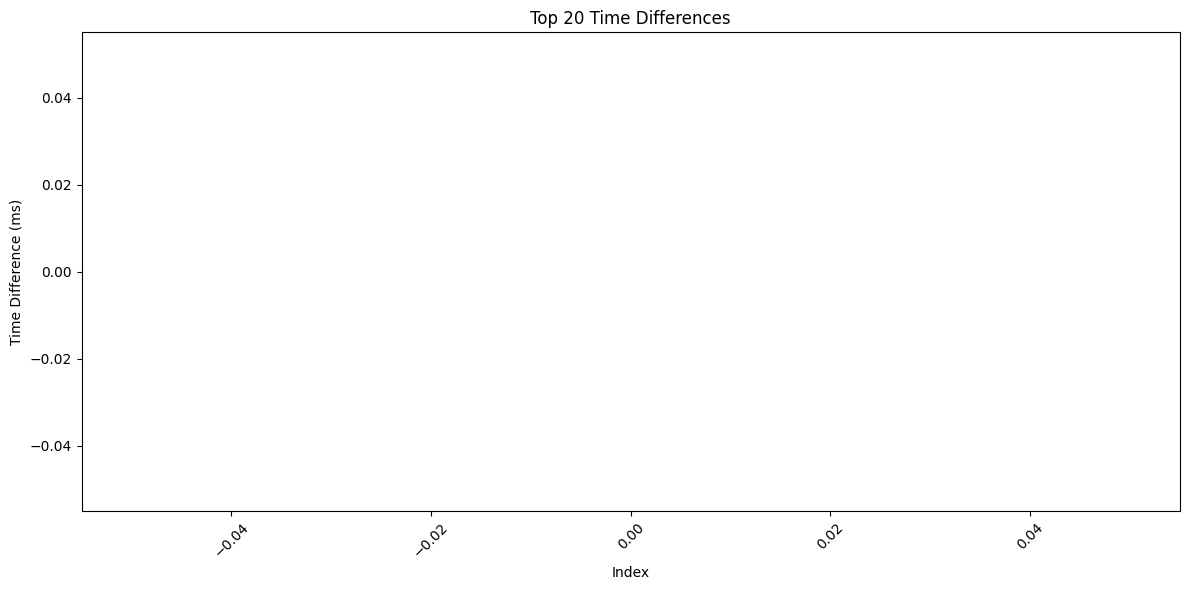

In [ ]:
#import pandas as pd
#from datetime import datetime
import re  # Add this line to import the re module

# Define the parsing function
def parse_log_line(line, line_number):
    # Regular expression patterns to match different log formats
    pattern_class = r'Class\.(\w+\.\w+)\.(\w+): line \((\d+)\)'
    pattern_method = r'(\d{2}:\d{2}:\d{2}\.\d{3}) \((\d+)\)\|(METHOD_ENTRY|METHOD_EXIT)\|\[(\d+)\]\|\|\|(.*?)\.(.*?)\((.*?)\)'

    match_class = re.search(pattern_class, line)
    match_method = re.search(pattern_method, line)

    if match_class:
        return {
            'timestamp': None,
            'class_name': match_class.group(1),
            'method_name': match_class.group(2),
            'line_number': float(match_class.group(3)),
            'column_number': None,  # Assuming not applicable for Class entries
            'type': 'Class',
            'details': None,
            'original_line_number': f"({match_class.group(3)})",
            'original_line': line_number
        }
    elif match_method:
        return {
            'timestamp': match_method.group(1),
            'class_name': match_method.group(6),
            'method_name': match_method.group(7),
            'line_number': float(match_method.group(4)),
            'column_number': None,  # Assuming not applicable for Method entries
            'type': match_method.group(3),
            'details': match_method.group(8),
            'original_line_number': f"({match_method.group(5)})",
            'original_line': line_number
        }
    elif "FATAL_ERROR" in line:
        return {
            'timestamp': None,
            'class_name': None,
            'method_name': None,
            'line_number': None,
            'column_number': None,
            'type': 'Error',
            'details': line.strip(),
            'original_line_number': None,
            'original_line': line_number
        }
    return None

# Function to read log file and parse entries into a DataFrame
def parse_log_file(file_path):
    log_entries = []
    with open(file_path, 'r') as file:
        for line_number, line in enumerate(file, 1):
            entry = parse_log_line(line.strip(), line_number)
            if entry:
                log_entries.append(entry)

    # Convert log_entries list to DataFrame
    log_df = pd.DataFrame(log_entries)

    # Calculate time difference in milliseconds between successive entries
    log_df['timestamp'] = pd.to_datetime(log_df['timestamp'], format='%H:%M:%S.%f', errors='coerce')
    log_df['time_diff_ms'] = log_df['timestamp'].diff().dt.total_seconds() * 1000

    # Filter entries where time difference > 1 second
    log_df_filtered = log_df[log_df['time_diff_ms'] > 100]

    return log_df_filtered

# Replace 'file_path' with your actual log file path
#file_path = '/content/sample_data/apex-07LDg00000R35WLMAZ.log' #// 91 Lines Log

file_path = '/content/sample_data/apex-07LDg00000R37aRMAR.log'  #// 84 Lines Log
log_df = parse_log_file(file_path)

# Display the DataFrame with time differences > 1 second
log_df.head()

# Plot the top 20 time differences
import matplotlib.pyplot as plt

top_20 = log_df.nlargest(20, 'time_diff_ms')
plt.figure(figsize=(12, 6))
plt.bar(top_20.index, top_20['time_diff_ms'], color='skyblue')
plt.xlabel('Index')
plt.ylabel('Time Difference (ms)')
plt.title('Top 20 Time Differences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [42]:
import re
import pandas as pd

# Define a function to parse each log entry
def parse_log_line(line, line_number):
    # Define regex patterns to match the different log formats
    pattern_class = re.compile(r'Class\.(\w+\.\w+)\.(\w+): line (\d+), column (\d+)')
    pattern_method = re.compile(r'(\d{2}:\d{2}:\d{2}\.\d{3}) \((\d+)\)\|(METHOD_ENTRY|METHOD_EXIT)\|\[(\d+)\]\|(\|\|)?(.*?)\.(.*?)\((.*?)\)')

    match_class = pattern_class.search(line)
    match_method = pattern_method.search(line)

    if match_class:
        return {
            'timestamp': None,
            'class_name': match_class.group(1),
            'method_name': match_class.group(2),
            'line_number': int(match_class.group(3)),
            'column_number': float(match_class.group(4)),
            'type': 'Class',
            'details': None,
            'original_line_number': line_number
        }
    elif match_method:
        return {
            'timestamp': match_method.group(1),
            'class_name': match_method.group(6),
            'method_name': match_method.group(7),
            'line_number': int(match_method.group(4)),
            'column_number': None,
            'type': match_method.group(3),
            'details': match_method.group(8),
            'original_line_number': line_number
        }
    elif "FATAL_ERROR" in line:
        return {
            'timestamp': None,
            'class_name': None,
            'method_name': None,
            'line_number': None,
            'column_number': None,
            'type': 'Error',
            'details': line.strip(),
            'original_line_number': line_number
        }
    return None

# List to store parsed log entries
log_entries = []

# Open the log file in read mode
with open('/content/sample_data/apex-07LDg00000R37tsMAB.log', 'r') as log_file:
    # Read the file line by line
    for i, line in enumerate(log_file):
        # Parse each line
        parsed_line = parse_log_line(line, i + 1)
        if parsed_line:
            # Add the parsed data to the list
            log_entries.append(parsed_line)

# Create a DataFrame from the parsed log entries
df = pd.DataFrame(log_entries)

# Identify the error lines and the preceding lines to understand the context
error_lines = df[df['type'] == 'Error']
error_contexts = []

# Extract the surrounding context for each error
for idx, error in error_lines.iterrows():
    start_idx = max(0, idx - 10)  # Adjust this value as needed to capture sufficient context
    end_idx = min(len(df), idx + 10)  # Adjust this value as needed to capture sufficient context
    context = df.iloc[start_idx:end_idx]
    error_contexts.append(context)

# Combine all error contexts into a single DataFrame for easier analysis
combined_error_contexts = pd.concat(error_contexts)

# Display the combined DataFrame
print(combined_error_contexts[['original_line_number', 'timestamp', 'class_name', 'method_name', 'line_number', 'type', 'details']])

# Save the combined DataFrame to a CSV file for further analysis if needed
combined_error_contexts.to_csv('error_contexts_log_entries.csv', index=False)


        original_line_number     timestamp  \
382038                450788  20:38:56.139   
382039                450789  20:38:56.139   
382040                450790  20:38:56.139   
382041                450791  20:38:56.139   
382042                450792  20:38:56.139   
382043                450793  20:38:56.139   
382044                450794  20:38:56.139   
382045                450795  20:38:56.139   
382046                450796  20:38:56.139   
382047                450797  20:38:56.139   
382048                450799          None   
382049                450801          None   
382050                450803          None   
382051                450804          None   
382052                450805          None   
382053                450806          None   
382054                450807          None   
382055                450808          None   
382056                450809          None   
382057                450810          None   
382061                450814      

In [32]:
import pandas as pd
import re
from datetime import datetime,date
import matplotlib.pyplot as plt

# Define a function to parse each log entry
def parse_log_line(line, line_number):
    # Define regex patterns to match the log formats
    pattern_execution = re.compile(r'(\d{2}:\d{2}:\d{2}\.\d{1,3}) \((\d+)\)\|EXECUTION_(STARTED|FINISHED)')
    pattern_code_unit = re.compile(r'(\d{2}:\d{2}:\d{2}\.\d{1,3}) \((\d+)\)\|CODE_UNIT_(STARTED|FINISHED)\|\[([^\]]+)\]|(\d{2}:\d{2}:\d{2}\.\d{1,3}) \((\d+)\)\|METHOD_(ENTRY|EXIT)\|\[(\d+)\]\|(\|\|)?(.*?)\.(.*?)\((.*?)\)')
    pattern_class = re.compile(r'Class\.(\w+\.\w+)\.(\w+): line (\d+), column (\d+)')
    pattern_method = re.compile(r'(\d{2}:\d{2}:\d{2}\.\d{3}) \((\d+)\)\|(METHOD_ENTRY|METHOD_EXIT)\|\[(\d+)\]\|(\|\|)?(.*?)\.(.*?)\((.*?)\)')
    pattern_normal = re.compile(r'(\d{2}:\d{2}:\d{2}\.\d{1,3}) \((\d+)\)\|(.*)\|(.*)')


    match_normal = pattern_normal.search(line)
    match_class = pattern_class.search(line)
    match_execution = pattern_execution.search(line)
    match_code_unit = pattern_code_unit.search(line)
    match_method = pattern_method.search(line)




    if match_normal:
        timestamp = match_normal.group(1)
        timestamp_data = match_normal.group(2)
        log_data = match_normal.group(3)
        additional_data = match_normal.group(4)
    #    print('Match Normal')

        return {
            'timestamp': timestamp,
            'line_number':timestamp_data ,
            'type':  log_data,
            'details': additional_data  + line.strip(),
            'original_line_number': line_number
        }


    elif match_class:
        return {
            'timestamp': None,
            'class_name': match_class.group(1),
            'method_name': match_class.group(2),
            'line_number': int(match_class.group(3)),
            'column_number': float(match_class.group(4)),
            'type': 'Class',
            'details': line.strip(),
            'original_line_number': line_number
        }
    elif match_execution:
        return {
            'timestamp': datetime.strptime(match_execution.group(1), '%H:%M:%S.%f'),
            'line_number': line_number,
            'type': f"EXECUTION_{match_execution.group(3)}",
            'details': line.strip(),
            'original_line_number': line_number
        }
    elif match_code_unit:
        if match_code_unit.group(3) == 'STARTED' or match_code_unit.group(3) == 'FINISHED':
            return {
                'timestamp': datetime.strptime(match_code_unit.group(1), '%H:%M:%S.%f'),
                'line_number': line_number,
                'type': f"CODE_UNIT_{match_code_unit.group(3)}",
                'details': match_code_unit.group(4) if match_code_unit.group(4) else line.strip(),
                'original_line_number': line_number
            }
        elif match_code_unit.group(6) == 'ENTRY' or match_code_unit.group(6) == 'EXIT':
            return {
                'timestamp': datetime.strptime(match_code_unit.group(5), '%H:%M:%S.%f'),
                'line_number': line_number,
                'type': f"METHOD_{match_code_unit.group(6)}",
                'details': match_code_unit.group(10)+line.strip(),
                'original_line_number': line_number
            }
        elif match_code_unit.group(3) == 'VARIABLE' or match_code_unit.group(3) == 'SCOPE':
            return {
                'timestamp': datetime.strptime(match_code_unit.group(5), '%H:%M:%S.%f'),
                'line_number': line_number,
                'type': f"_{match_code_unit.group(3)}",
                'details': match_code_unit.group(10)+line.strip(),
                'original_line_number': line_number
            }

    elif match_method:
        return {
            'timestamp': datetime.strptime(match_method.group(1), '%H:%M:%S.%f'),
            'line_number': line_number,
            'type': f"METHOD_{match_method.group(3)}",
            'details': match_method.group(5)+line.strip(),
            'original_line_number': line_number
        }
    elif "FATAL_ERROR" in line:
        return {
            'timestamp': None,
            'class_name': None,
            'method_name': line_number,
            'line_number': line_number,
            'column_number': None,
            'type': 'Error',
            'details': line.strip(),
            'original_line_number': line_number
        }

    return None

# Function to read log file and parse entries into a DataFrame
def parse_log_file(file_path):
    log_entries = []
    with open(file_path, 'r') as file:
        for line_number, line in enumerate(file, 1):
            entry = parse_log_line(line.strip(), line_number)
            if entry:
                log_entries.append(entry)
    return pd.DataFrame(log_entries)

# Replace 'file_path' with your actual log file path
file_path = '/content/sample_data/apex-07LDg00000R3FvlMAF.log'
#file_path = '/content/sample_data/467636493'
log_df = parse_log_file(file_path)

# Print first few rows and columns of the DataFrame
print("First few rows of the DataFrame:")

# Convert 'timestamp' column to datetime
log_df['timestamp'] = pd.to_datetime(log_df['timestamp'], format='%H:%M:%S.%f')

# Create 'timeentry' column with the time part only
log_df['timeentry'] = log_df['timestamp'].dt.time



log_df.head()





First few rows of the DataFrame:


,timestamp,line_number,type,details,original_line_number,class_name,method_name,column_number,timeentry
0,1900-01-01 11:08:17,228143,USER_INFO|[EXTERNAL]|00523000005IDvv|sharma.ar...,GMT-07:0011:08:17.0 (228143)|USER_INFO|[EXTERN...,2,NaN,NaN,NaN,11:08:17
1,1900-01-01 11:08:17,3,EXECUTION_STARTED,11:08:17.0 (1403666)|EXECUTION_STARTED,3,NaN,NaN,NaN,11:08:17
2,1900-01-01 11:08:17,1430460,CODE_UNIT_STARTED|[EXTERNAL],apex://vlocity_cmt.ComponentController/ACTION$...,4,NaN,NaN,NaN,11:08:17
3,1900-01-01 11:08:17,2009060,CODE_UNIT_STARTED|[EXTERNAL]|01p3g000000TjtY,vlocity_cmt.ComponentController.handleData(Str...,5,NaN,NaN,NaN,11:08:17
4,1900-01-01 11:08:17,2366024,METHOD_ENTRY|[1]|01p3g000000TjtY,vlocity_cmt.ComponentController.ComponentContr...,6,NaN,NaN,NaN,11:08:17


Number of rows with 'Apex CPU time limit exceeded' error: 2
Entries with Apex CPU time limit exceeded:
+---------+----------------------------+---------------+-------------+----------------------------------------------------------------------------------------------------------------------------------------------+------------------------+--------------+---------------+-----------------+-----------------+----------------+----------------------------+
|   index | timestamp                  |   line_number | type        | details                                                                                                                                      |   original_line_number |   class_name |   method_name |   column_number | timeentry       |   time_diff_ms | logdatetime                |
+=========+============================+===============+=============+===========================================================================================================================

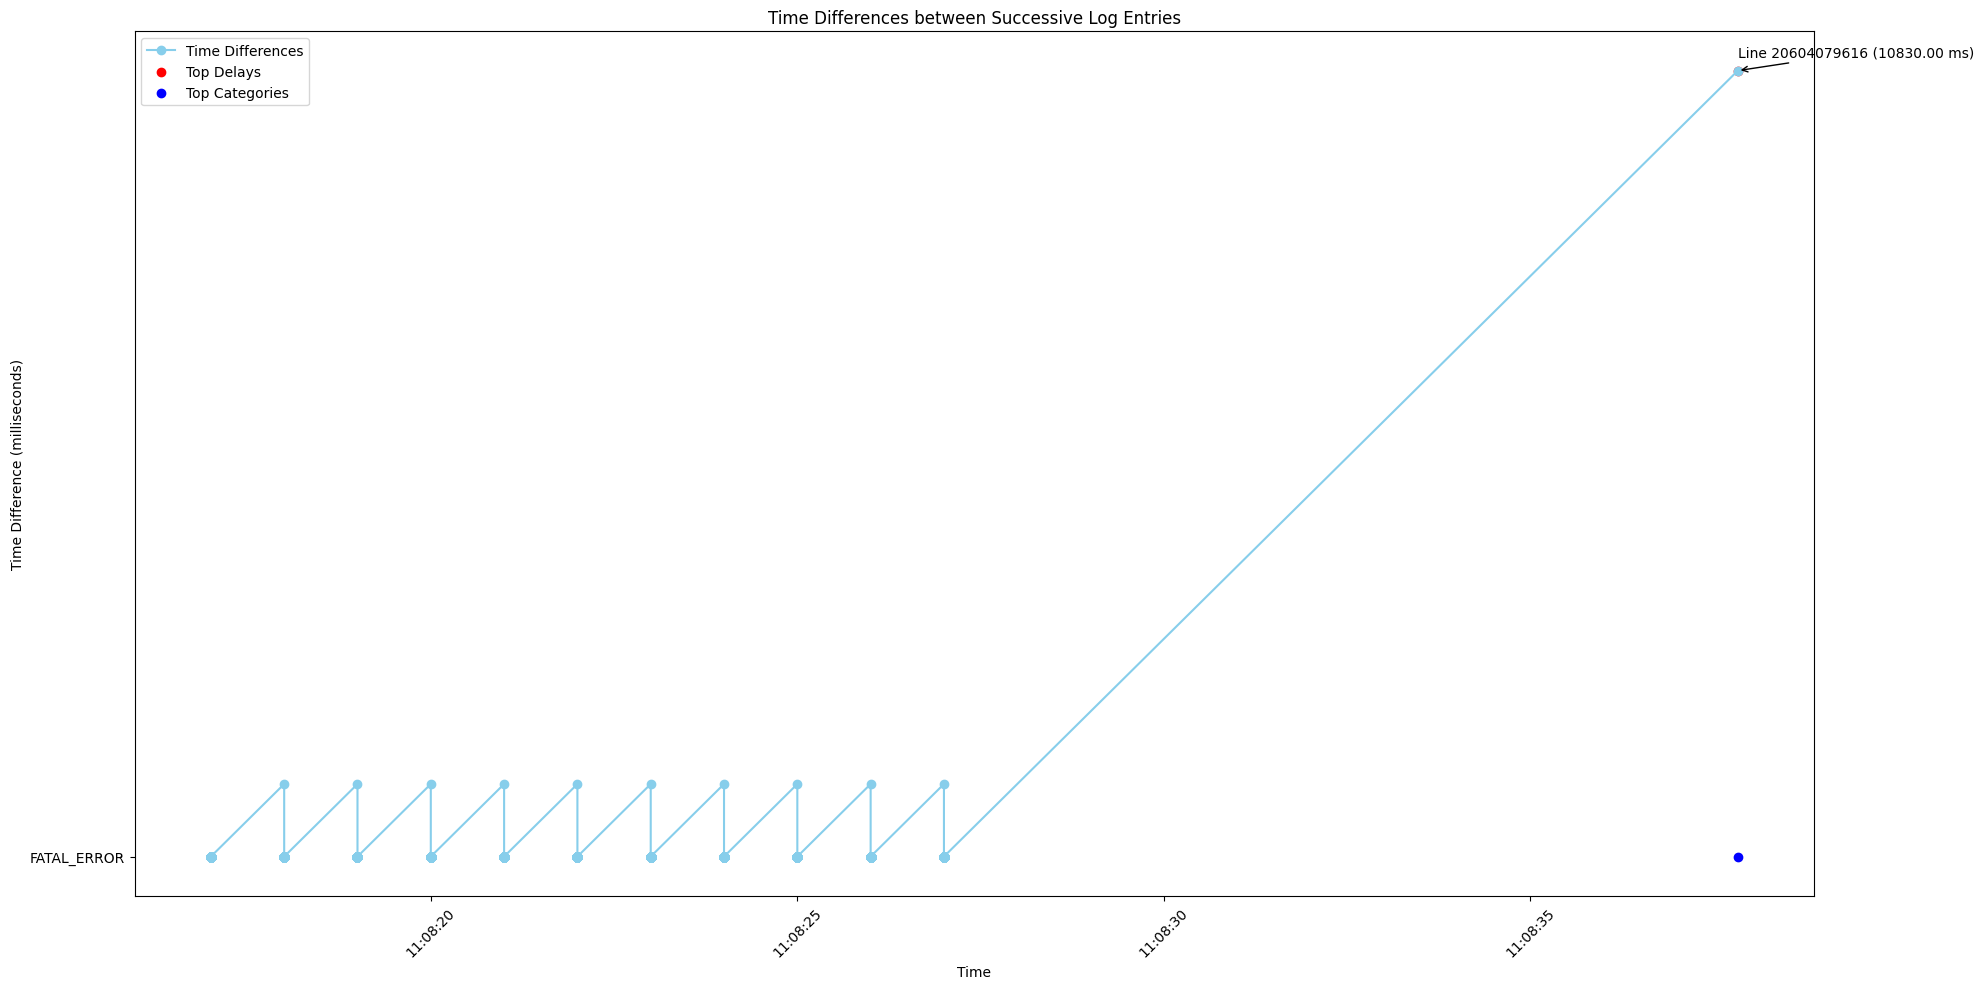


DataFrame without the timestamp column:
            timestamp line_number  \
0 1900-01-01 11:08:17      228143   
1 1900-01-01 11:08:17           3   
2 1900-01-01 11:08:17     1430460   
3 1900-01-01 11:08:17     2009060   
4 1900-01-01 11:08:17     2366024   

                                                type  \
0  USER_INFO|[EXTERNAL]|00523000005IDvv|sharma.ar...   
1                                  EXECUTION_STARTED   
2                       CODE_UNIT_STARTED|[EXTERNAL]   
3       CODE_UNIT_STARTED|[EXTERNAL]|01p3g000000TjtY   
4                   METHOD_ENTRY|[1]|01p3g000000TjtY   

                                             details  original_line_number  \
0  GMT-07:0011:08:17.0 (228143)|USER_INFO|[EXTERN...                     2   
1             11:08:17.0 (1403666)|EXECUTION_STARTED                     3   
2  apex://vlocity_cmt.ComponentController/ACTION$...                     4   
3  vlocity_cmt.ComponentController.handleData(Str...                     5   
4  vlocit

In [41]:
# Assuming 'log_df' DataFrame is already defined and contains the necessary columns including 'details'
from tabulate import tabulate

# Calculate time differences in milliseconds manually
log_df['time_diff_ms'] = log_df['timestamp'].diff().apply(lambda x: x.total_seconds() * 1000 if pd.notnull(x) else None)

# Filter log entries for "Apex CPU time limit exceeded"
cpu_time_out_entries = log_df[log_df['details'].str.contains("Apex CPU time limit exceeded")]





#print(cpu_time_out_entries)

# Count rows with "Apex CPU time limit exceeded"
cpu_time_out_count = log_df[log_df['details'].str.contains("Apex CPU time limit exceeded")].shape[0]
#print(cpu_time_out_entries.info())
# Print or further process the filtered entries
print(f"Number of rows with 'Apex CPU time limit exceeded' error: {cpu_time_out_count}")
headers = ["index","timestamp", "line_number","type","details", 	"original_line_number","class_name", "method_name","column_number","timeentry","time_diff_ms","logdatetime"]
print("Entries with Apex CPU time limit exceeded:")
print(tabulate(cpu_time_out_entries, headers=headers, tablefmt='grid'))

exception_entries = log_df[log_df['details'].str.contains("Exception")]
print("Entries with Exception :")
print(tabulate(exception_entries, headers=headers, tablefmt='grid'))


# Print or further process the filtered entries

#print(exception_entries['details'])
# Define headers



# Count rows with "Apex CPU time limit exceeded"
exception_entries_count = len(exception_entries)

print(f"Number of rows with 'Exception' error: {exception_entries_count}")




# Calculate total time difference
total_time_difference = log_df['time_diff_ms'].sum()

#print(f"Total time difference between successive log entries: {total_time_difference:.2f} milliseconds")

null_timestamps = log_df[log_df['timestamp'].isnull()]

# Display rows where timestamp is null
#print("Rows with null timestamps:")
#print(null_timestamps)

# Filter non-null values
timeentries = log_df['timeentry']
valid_entries = timeentries.dropna()

# Get today's date
today = date.today()
#log_df['datetime'] = valid_entries.apply(lambda t: datetime.combine(today, t))
# Drop NaN values from timeentry and combine with today's date
log_df['logdatetime'] = log_df['timeentry'].dropna().apply(lambda t: datetime.combine(today, t))



# Check if there are valid entries to calculate difference
if len(valid_entries) > 1:
    start_time = valid_entries.iloc[0]
    end_time = valid_entries.iloc[-1]

    # Convert start_time and end_time to datetime objects for subtraction
    start_datetime = pd.to_datetime(start_time.strftime('%H:%M:%S.%f'), format='%H:%M:%S.%f')
    end_datetime = pd.to_datetime(end_time.strftime('%H:%M:%S.%f'), format='%H:%M:%S.%f')

    # Calculate total time difference
    total_time_difference = end_datetime - start_datetime
    total_time_difference_seconds = total_time_difference.total_seconds()

    print(f"Total time difference in seconds: {total_time_difference_seconds}")
else:
    print("Not enough valid entries to calculate time difference.")


      # Filter for time differences greater than 1000 milliseconds (1 second)
large_diffs = log_df[log_df['time_diff_ms'] > 1000]

    # Display the top 20 time differences
top_20_time_diff = large_diffs.nlargest(20, 'time_diff_ms')
print("\nTop 20 Time Differences:")
print(top_20_time_diff[['timeentry', 'time_diff_ms', 'line_number','details']])

    # Plotting the top 20 time differences with annotations
plt.figure(figsize=(20, 10))
plt.plot(log_df['logdatetime'], log_df['time_diff_ms'], marker='o', linestyle='-', color='skyblue', label='Time Differences')
plt.scatter(top_20_time_diff['logdatetime'], top_20_time_diff['time_diff_ms'], color='red', label='Top Delays')
plt.scatter(top_20_time_diff['logdatetime'], top_20_time_diff['type'], color='blue', label='Top Categories')

    # Annotate the top delays with details
for index, row in top_20_time_diff.iterrows():
  plt.annotate(f"Line {row['line_number']} ({row['time_diff_ms']:.2f} ms)",
                     xy=(row['logdatetime'], row['time_diff_ms']),
                     xytext=(0, 10),
                     textcoords='offset points',
                     arrowprops=dict(arrowstyle='->', color='black'))

plt.xlabel('Time')
plt.ylabel('Time Difference (milliseconds)')
plt.title('Time Differences between Successive Log Entries')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

    # Drop the timestamp column (if not needed)
    #log_df1 = log_df.drop(columns=['timestamp'])

    # Print the DataFrame without the timestamp column
print("\nDataFrame without the timestamp column:")
print(log_df.head())
#sns.histplot(log_df,x="time_diff_ms",bins=5,kde=True,hue="original_line_number")

In [34]:
from tabulate import tabulate
exception_entries = log_df[log_df['details'].str.contains("ExecutionException")]


# Example data
data = [
    ['2024-07-04 20:38:43', 252420, 1000, 'Apex CPU time limit exceeded'],
    ['2024-07-04 20:39:43', 252421, 2000, 'ExecutionException'],
    ['2024-07-04 20:40:43', 252422, 1500, 'Apex CPU time limit exceeded']
]

# Define headers
headers = ["timestamp", "line_number", "time_diff_ms", "details"]
#headers = ["details"]
print('Exception Entries',data)

# Display the table
#print(tabulate(log_df, headers=headers, tablefmt='grid'))


Exception Entries [['2024-07-04 20:38:43', 252420, 1000, 'Apex CPU time limit exceeded'], ['2024-07-04 20:39:43', 252421, 2000, 'ExecutionException'], ['2024-07-04 20:40:43', 252422, 1500, 'Apex CPU time limit exceeded']]


In [ ]:
# To build models for prediction
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor

# To encode categorical variables
from sklearn.preprocessing import LabelEncoder

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To check model performance
from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error

In [35]:
# Copying data to another variable to avoid any changes to original data
same_data =log_df.copy()

In [38]:
# View the first 5 rows of the dataset
same_data.head()
#same_data.shape
#same_data.info()

#same_data.isnull().sum()

#same_data.describe()

,timestamp,line_number,type,details,original_line_number,class_name,method_name,column_number,timeentry,time_diff_ms,logdatetime
0,1900-01-01 11:08:17,228143,USER_INFO|[EXTERNAL]|00523000005IDvv|sharma.ar...,GMT-07:0011:08:17.0 (228143)|USER_INFO|[EXTERN...,2,NaN,NaN,NaN,11:08:17,NaN,2024-07-08 11:08:17
1,1900-01-01 11:08:17,3,EXECUTION_STARTED,11:08:17.0 (1403666)|EXECUTION_STARTED,3,NaN,NaN,NaN,11:08:17,0.0,2024-07-08 11:08:17
2,1900-01-01 11:08:17,1430460,CODE_UNIT_STARTED|[EXTERNAL],apex://vlocity_cmt.ComponentController/ACTION$...,4,NaN,NaN,NaN,11:08:17,0.0,2024-07-08 11:08:17
3,1900-01-01 11:08:17,2009060,CODE_UNIT_STARTED|[EXTERNAL]|01p3g000000TjtY,vlocity_cmt.ComponentController.handleData(Str...,5,NaN,NaN,NaN,11:08:17,0.0,2024-07-08 11:08:17
4,1900-01-01 11:08:17,2366024,METHOD_ENTRY|[1]|01p3g000000TjtY,vlocity_cmt.ComponentController.ComponentContr...,6,NaN,NaN,NaN,11:08:17,0.0,2024-07-08 11:08:17


In [ ]:
same_data['details'].value_counts()

# Creating dummy variables for the categorical columns
# drop_first=True is used to avoid redundant variables
same_data = pd.get_dummies(
    same_data,
    columns = same_data.select_dtypes(include = ["object", "category"]).columns.tolist(),
    drop_first = True,
)